In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/day20-1/train.csv


In [2]:
import pandas as pd
import numpy as np
import scipy.stats as stats

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
 
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

In [3]:
df=pd.read_csv("/kaggle/input/day20-1/train.csv")

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df1=pd.DataFrame(df,columns=["Survived","Age","Fare"])

In [6]:
df1.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [7]:
df1.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [8]:
df1["Age"]=df1["Age"].fillna(df1["Age"].mean( ))

In [9]:
X=df1.iloc[:,1:3]
y=df1.iloc[:,0:1]

In [10]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


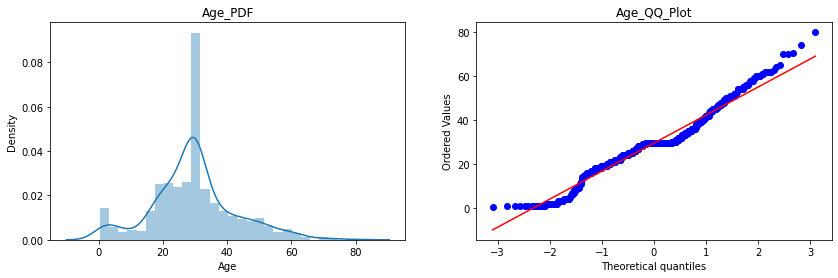

In [11]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(X_train["Age"])
plt.title("Age_PDF")

plt.subplot(122)
stats.probplot(X_train["Age"],dist="norm",plot=plt)
plt.title("Age_QQ_Plot")

plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


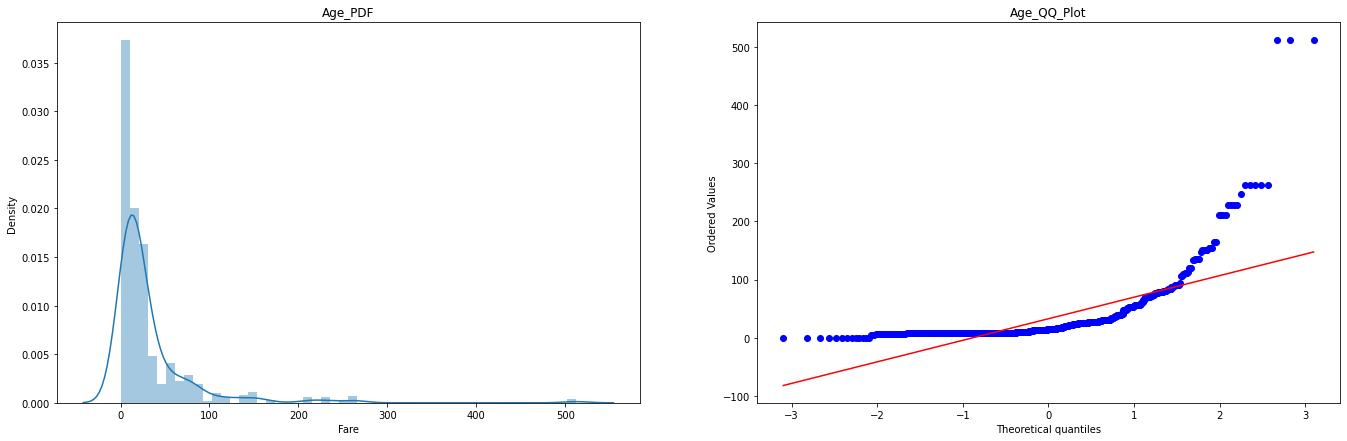

In [12]:
plt.figure(figsize=(23,7))
plt.subplot(121)
sns.distplot(X_train["Fare"])
plt.title("Age_PDF")

plt.subplot(122)
stats.probplot(X_train["Fare"],dist="norm",plot=plt)
plt.title("Age_QQ_Plot")

plt.show()

In [13]:
clf=LogisticRegression()
clf2=DecisionTreeClassifier()

In [14]:
clf.fit(X_train,y_train)
clf2.fit(X_train,y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


DecisionTreeClassifier()

In [15]:
y_pred=clf.predict(X_test)
y_pred2=clf2.predict(X_test)

In [16]:
accuracy_score(y_test,y_pred)

0.6480446927374302

In [17]:
accuracy_score(y_test,y_pred2)

0.659217877094972

In [18]:
trf=FunctionTransformer(func=np.log1p)

In [19]:
X_train_transformed=trf.fit_transform(X_train)
X_test_transformed=trf.fit_transform(X_test)

In [20]:
clf=LogisticRegression()
clf2=DecisionTreeClassifier()

In [21]:
clf.fit(X_train_transformed,y_train)
clf2.fit(X_train_transformed,y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


DecisionTreeClassifier()

In [22]:
y_pred=clf.predict(X_test_transformed)
y_pred2=clf2.predict(X_test_transformed)

In [23]:
accuracy_score(y_pred,y_test)


0.6815642458100558

In [24]:
accuracy_score(y_pred2,y_test)

0.6759776536312849

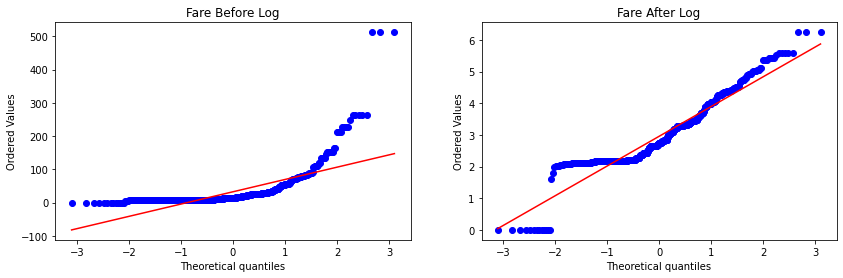

In [25]:
plt.figure(figsize=(14,4))

plt.subplot(121)
stats.probplot(X_train['Fare'], dist="norm", plot=plt)
plt.title('Fare Before Log')

plt.subplot(122)
stats.probplot(X_train_transformed['Fare'], dist="norm", plot=plt)
plt.title('Fare After Log')

plt.show()